## Library

In [1]:
import dill
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 40000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))

In [3]:
tai_flop_size = sq.sample(load_cache_file='caches/meta_anchor')  # Cache generated in "Anchors" notebook
tai_flop_size = [round(t, 1) for t in tai_flop_size]
sq.get_percentiles(tai_flop_size)

{1: 23.499000000000002,
 5: 25.1,
 10: 25.9,
 20: 26.8,
 30: 27.8,
 40: 29.0,
 50: 30.8,
 60: 32.7,
 70: 34.8,
 80: 37.4,
 90: 40.9,
 95: 44.1,
 99: 50.0}

In [4]:
initial_pay = sq.sample(load_cache_file='caches/initial_pay')  # Cache generated in "Initial pay" notebook
initial_pay = [round(p, 1) for p in initial_pay]
# TODO: Suspicious this is not working in the model correctly
sq.get_percentiles(initial_pay)

{1: 7.4,
 5: 7.6,
 10: 7.7,
 20: 7.9,
 30: 8.0,
 40: 8.1,
 50: 8.2,
 60: 8.3,
 70: 8.5,
 80: 8.7,
 90: 9.0,
 95: 9.3,
 99: 9.8}

In [5]:
# PROBABILITY OF A NONSCALING DELAY

# set to None to have no delay
# Otherwise specified in a dictionary
# {'delay': {'prob': <array of probabilities by year>, 'length': <distribution to sample from to get length of delay>}}

# Cache defined in "(3B) Nonscaling Delay Curve"

with open('caches/nonscaling_delays.dill', 'rb') as f:
    delay = dill.load(f)

print('loaded!')

loaded!


In [6]:
def wildeford_max_gdp_frac():
    small_project = sq.lognorm(1 / (250*K), 1 / (3*K))
    modern_megaproject = sq.lognorm(1/K, 1/600)
    old_form_megaproject = sq.lognorm(1/K, 1/150)
    gigaproject = sq.lognorm(1/150, 1/50)
    
    r_ = random.random()
    if r_ < 0.1:
        gdp_frac = small_project
        percent_spent_on_compute = sq.lognorm(0.5, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.7:
        gdp_frac = modern_megaproject
        percent_spent_on_compute = sq.lognorm(0.7, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.9:
        gdp_frac = old_form_megaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.95, lclip=0.1, rclip=0.999)
    else:
        gdp_frac = gigaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.99, lclip=0.1, rclip=0.999)
        
    models_trained_per_year_for_budget = sq.lognorm(1, 10)

    return ~gdp_frac * ~percent_spent_on_compute / ~models_trained_per_year_for_budget


variables = {'initial_gdp': 23*T,
             'tai_flop_size': tai_flop_size,
             'algo_doubling_rate_max': 3,
             'algo_doubling_rate_min': 1,
             'min_reduction': 2,
             'max_reduction': 5,
             'initial_flop_per_dollar': 18.3,
             'flop_halving_rate': sq.norm(2.5, 3),       # https://epochai.org/blog/predicting-gpu-performance
             'max_flop_per_dollar': sq.lognorm(21, 24),  # https://epochai.org/blog/predicting-gpu-performance
             'initial_pay': initial_pay,
             'gdp_growth': sq.lognorm(1.01, 1.035, lclip=1.005),
             'max_gdp_frac': wildeford_max_gdp_frac, # TODO: Willingness to spend connected to commercialization
             'spend_doubling_time': sq.norm(1.5, 4.5, lclip=1),
             '2025_spend_doubling_time': sq.norm(0.93, 1.1, lclip=0.9),
             'nonscaling_delay': delay}

print('Loaded')


Loaded


## Run Wildeford timelines model

-
-
## SAMPLE RUN 1 ##
It takes 31.7 log FLOP (~50 nonillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.9 years they get 2x cheaper, to a maximum of 22.4 log FLOP (~25 sextillion) per 2022$USD.
We are initially willing to pay 8.0 log 2022$USD (~100 million). This doubles every 1.0 years until 2025, and then doubles every 3.4 years to a max of 0.000159% of GDP. GDP grows at a rate of 1.018x per year.
There are 3 ways a non-scaling delay could happen.
- algorithms: additional <Distribution> lognorm(mean=2.25, sd=0.7) years if it happens
## Chance of nonscaling delay ##


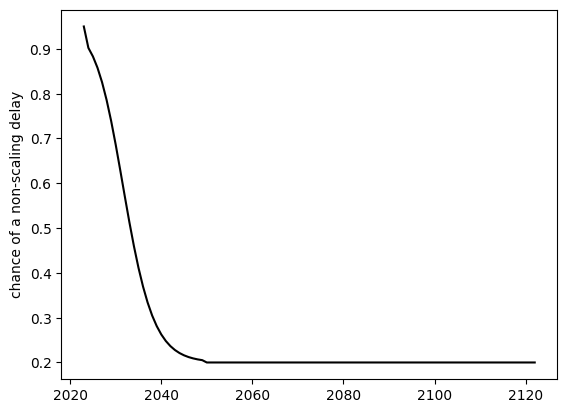

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 74%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2033

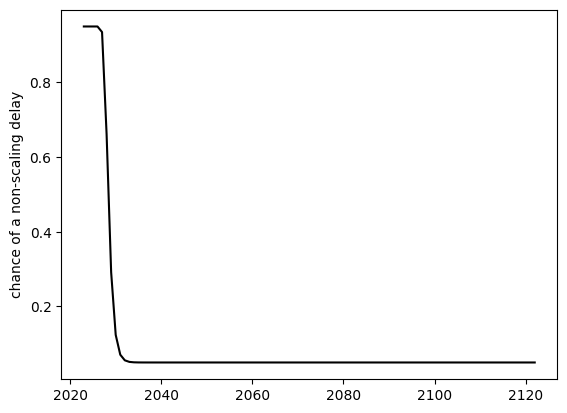

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

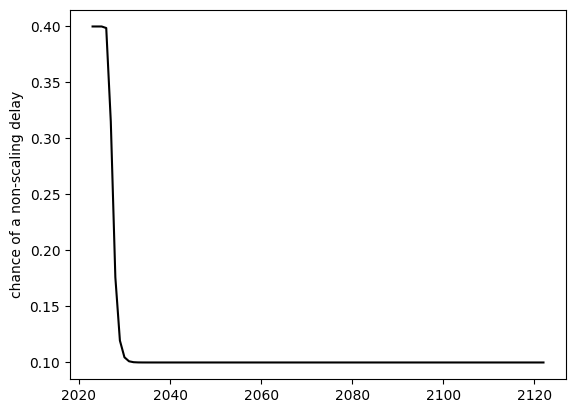

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

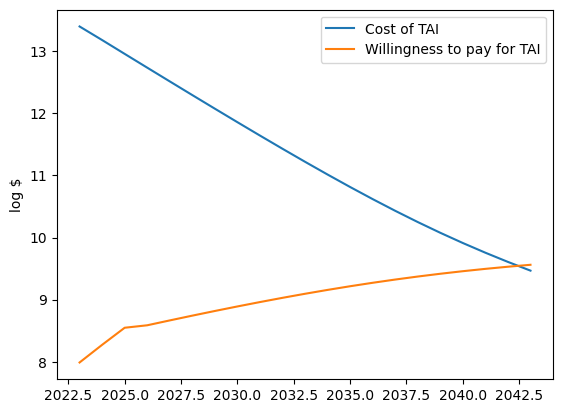

-
-
## SAMPLE RUN 2 ##
It takes 26.7 log FLOP (~501 septillion) for transformative capabilities.
Every 3 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.8 years they get 2x cheaper, to a maximum of 24.1 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 7.3 log 2022$USD (~20 million). This doubles every 1.0 years until 2025, and then doubles every 5.1 years to a max of 0.0001% of GDP. GDP grows at a rate of 1.018x per year.
There are 3 ways a non-scaling delay could happen.
- algorithms: additional <Distribution> lognorm(mean=2.25, sd=0.7) years if it happens
## Chance of nonscaling delay ##


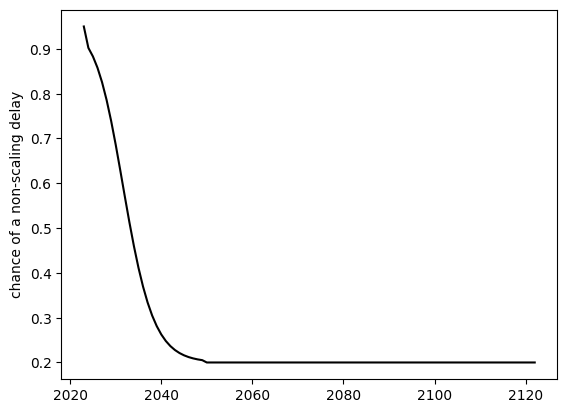

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 74%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2033

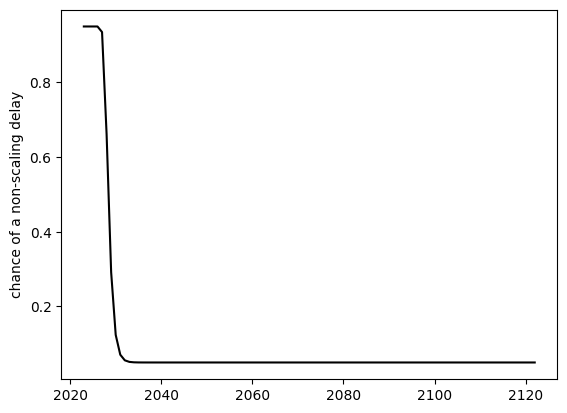

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

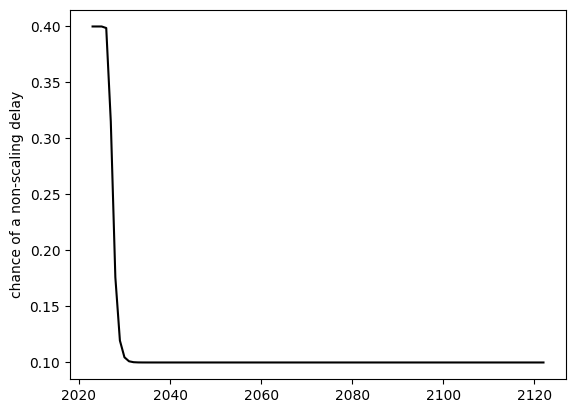

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

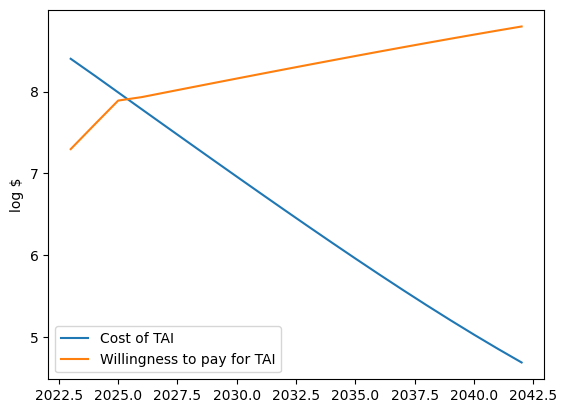

-
-
## SAMPLE RUN 3 ##
It takes 33.1 log FLOP (~1 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.8 years they get 2x cheaper, to a maximum of 23.1 log FLOP (~116 sextillion) per 2022$USD.
We are initially willing to pay 8.2 log 2022$USD (~158 million). This doubles every 1.0 years until 2025, and then doubles every 2.6 years to a max of 0.001617% of GDP. GDP grows at a rate of 1.006x per year.
There are 3 ways a non-scaling delay could happen.
- algorithms: additional <Distribution> lognorm(mean=2.25, sd=0.7) years if it happens
## Chance of nonscaling delay ##


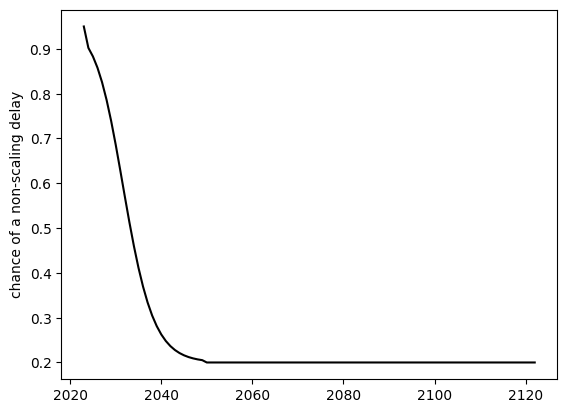

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 74%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2033

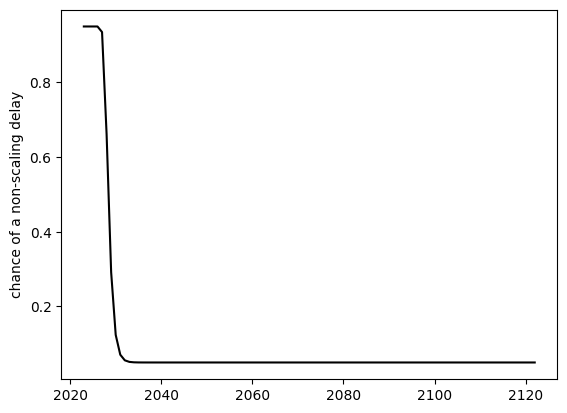

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

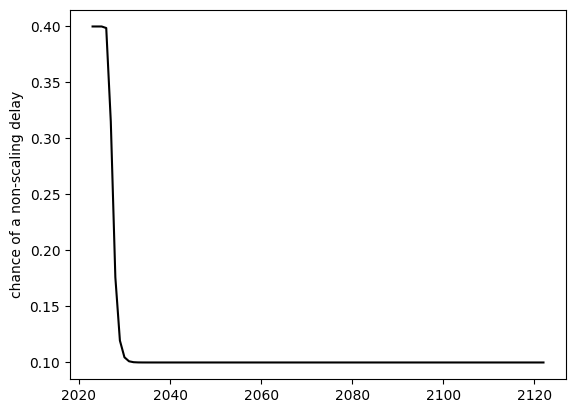

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

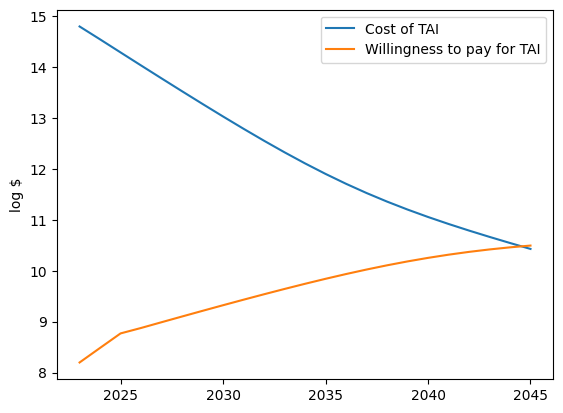

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


  3%|█████▏                                                                                                                                                           | 1290/40000 [00:12<03:50, 167.98it/s]

In [ ]:
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'], dump_cache_file='caches/tai_years')